# Adaptive Thresholding and Niblack's Thresholding

## Importing Necessary Libraries

In [18]:
%matplotlib inline

import argparse
import cv2
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import imageio.core.util

def ignore_warnings(*args, **kwargs):
    pass

imageio.core.util._precision_warn = ignore_warnings

# scikit-image
from skimage.filters import (threshold_otsu, threshold_niblack)
from skimage.io import imsave
from skimage import img_as_uint

## Function for Displaying Images

In [2]:
# Display image
def display_img(image):
    # Load image using cv2 and do processing.
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # As opencv loads in BGR format by default, we want to show it in RGB.
    plt.show()

    return

## Read the Image

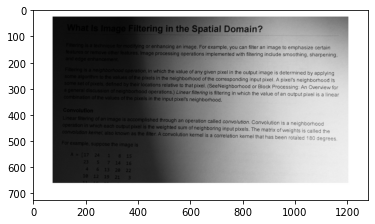

In [3]:
# Load the image and display it
image = cv2.imread('../resources/input_image.jpeg')

# Display the image
display_img(image)

## Convert the Image to Grayscale

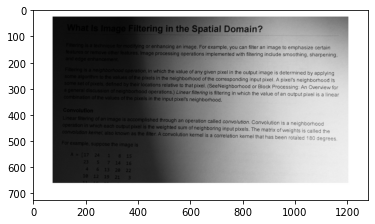

In [4]:
# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
display_img(gray)

## Global Thresholding Techniques for Comparison

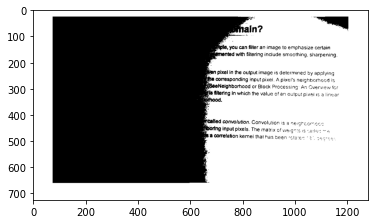

In [5]:
# Apply Otsu's automatic thresholding
(T, threshInv) = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

threshInv = 255 - threshInv
display_img(threshInv)

## Adaptive Thresholding

### With Arithmetic Mean

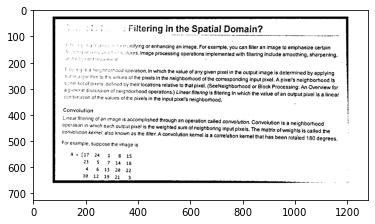

In [6]:
# Here adaptive thresholding is done through arithmetic mean
thresh_arithmetic = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 21, 10)

thresh_arithmetic = 255 - thresh_arithmetic

display_img(thresh_arithmetic)

### With Gaussian Mean

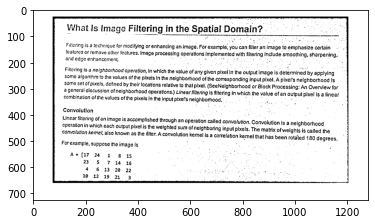

In [7]:
# Here adaptive thresholding is done through Gaussian mean
thresh_gauss = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 21, 4)

thresh_gauss = 255 - thresh_gauss

display_img(thresh_gauss)

## Niblack's Thresholding

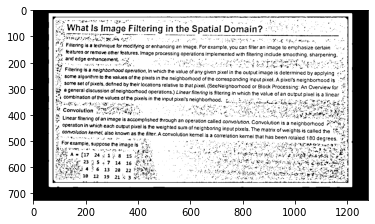

In [8]:
window_size = 25
thresh_niblack = threshold_niblack(gray, window_size=window_size, k=0.8)
binary_niblack = gray > thresh_niblack

plt.imshow(binary_niblack, cmap=plt.cm.gray)
plt.show()

## Quantitative Analysis

### Running the algorithms on the dataset

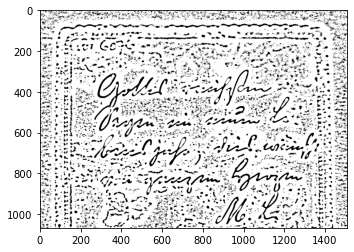

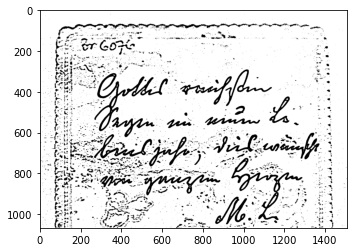

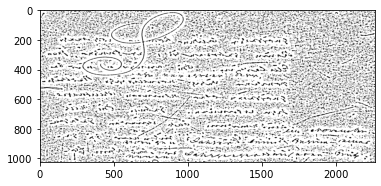

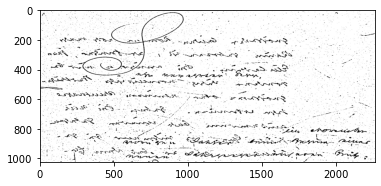

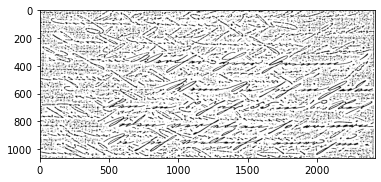

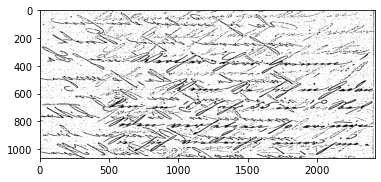

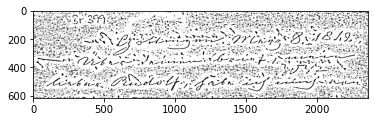

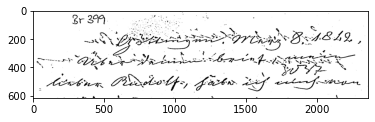

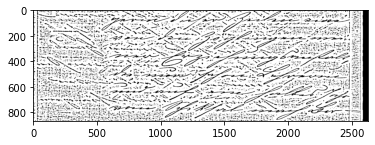

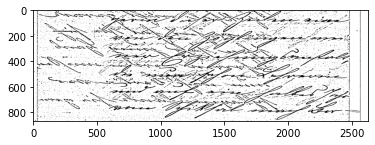

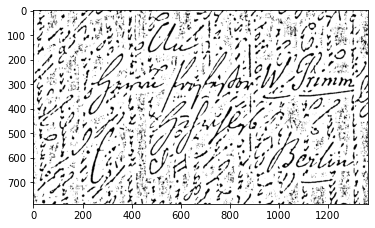

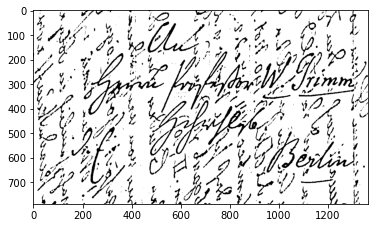

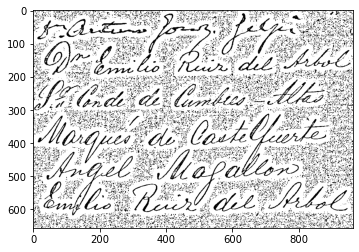

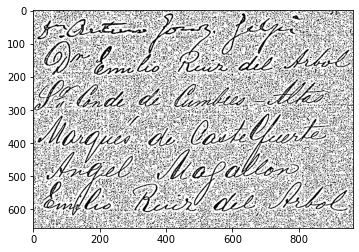

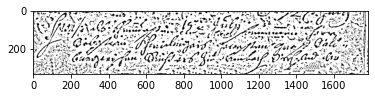

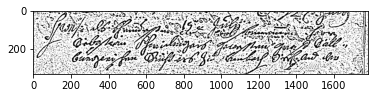

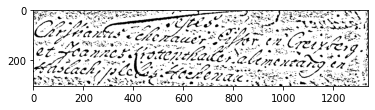

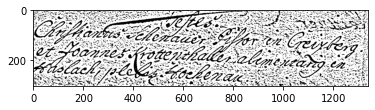

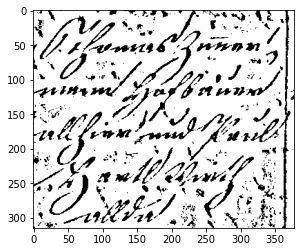

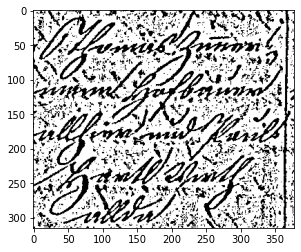

In [16]:
def niblack_threshold(img_path):
    # Read the image and convert to grayscale
    image = cv2.imread(img_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Niblack thresholding
    window_size = 25
    thresh_niblack = threshold_niblack(gray_image, window_size=window_size, k=0.8)
    binary_niblack = gray_image > thresh_niblack

    # Display result
    plt.imshow(binary_niblack, cmap=plt.cm.gray)
    plt.show()
    
    # Save result
    img_name = img_path.split('/')[-1]
    output_path = '../quantitative_analysis/niblack_results/' + img_name
    imsave(output_path, img_as_uint(binary_niblack), check_contrast=False)

def adaptive_threshold(img_path):
    # Read the image and convert to grayscale
    image = cv2.imread(img_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply adaptive thresholding
    thresh_gauss = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 21, 4)
    thresh_gauss = 255 - thresh_gauss

    # Display result
    display_img(thresh_gauss)

    # Save result
    img_name = img_path.split('/')[-1]
    output_path = '../quantitative_analysis/adaptive_results/' + img_name
    cv2.imwrite(output_path, thresh_gauss)
    
# Iterate through all images in the dataset and apply binarization
for i in range(1, 11):
    img_path = "../quantitative_analysis/dataset/" + str(i) + ".bmp"
    niblack_threshold(img_path)
    adaptive_threshold(img_path)

### Finding the Mean Squared Error

In [19]:
# Find Mean Squared Error for every pair of images

# Arrays to hold all the MSE values for both algorithms
mse_adaptive_arr = []
mse_niblack_arr = []

for it in range(1, 11):
    img_path_gt = "../quantitative_analysis/ground_truths/" + str(it) + "_gt.bmp"
    img_path_adaptive = "../quantitative_analysis/adaptive_results/" + str(it) + ".bmp"
    img_path_niblack = "../quantitative_analysis/niblack_results/" + str(it) + ".bmp"
    
    # Open images
    img_gt = Image.open(img_path_gt).convert('L')
    img_adaptive = Image.open(img_path_adaptive).convert('L')
    img_niblack = Image.open(img_path_niblack).convert('L')
    
    # Convert to numpy array
    npimage_gt = np.asarray(img_gt)
    npimage_adaptive = np.asarray(img_adaptive)
    npimage_niblack = np.asarray(img_niblack)
    
    # Check if dimensions match
    assert npimage_gt.shape == npimage_adaptive.shape
    assert npimage_gt.shape == npimage_niblack.shape

    m, n = npimage_gt.shape
    print(m, n)
    
    # Image is in grayscale (0 - 255), first convert to binary (0 or 1)
    binimage_gt = np.zeros((m, n))
    binimage_adaptive = np.zeros((m, n))
    binimage_niblack = np.zeros((m, n))
    
    # MSE can be found in this loop itself but another loop is added to show clarity to the calculation
    for i in range(0, m):
        for j in range(0, n):
            if npimage_gt[i][j] == 255:
                binimage_gt[i][j] = 1
            if npimage_adaptive[i][j] == 255:
                binimage_adaptive[i][j] = 1
            if npimage_niblack[i][j] == 255:
                binimage_niblack[i][j] = 1

    mse_adaptive = 0
    mse_niblack = 0
    for i in range(0, m):
        for j in range(0, n):
            mse_adaptive += (binimage_adaptive[i][j] - binimage_gt[i][j])**2
            mse_niblack += (binimage_niblack[i][j] - binimage_gt[i][j])**2

    # Divide total by number of pixels
    mse_adaptive /= (m * n)
    mse_niblack /= (m * n)
    
    # Add values to array
    mse_adaptive_arr.append(mse_adaptive)
    mse_niblack_arr.append(mse_niblack)

1067 1510
1023 2259
1064 2417
615 2363
867 2628
788 1364
656 963
334 1782
302 1339
315 378


In [20]:
print(mse_adaptive_arr)
print(mse_niblack_arr)

[0.05494392273937573, 0.04437468979301649, 0.09114635990057891, 0.035058782242498684, 0.07178306903386299, 0.09541677210950177, 0.17838531773168198, 0.14775331491898358, 0.12859255449109497, 0.15443856554967667]
[0.13706188670345154, 0.15798692922455934, 0.129947723051941, 0.13831941620304905, 0.13147911147626748, 0.12552659392351548, 0.12370513892054809, 0.14757017950630724, 0.09136253703218276, 0.08461409255060048]
